In [1]:
import numpy as np
import pandas as pd

import torch
import torch.nn

from times import StyleScoreVAE
from ssvae_trainer import SSVAETrainer

%matplotlib inline

In [2]:
mf = pd.read_csv('./dataset/multifactor_score_20200228.csv', index_col=0, header=0)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [37]:
mf[mf['code'] == 'A005930']

,code,trade_date,pm_5,pm_10,pm_20,pm_40,pm_60,pm_90,pm_120,pm_250,...,skew_250,turnover_5,turnover_10,turnover_20,turnover_40,turnover_60,turnover_90,turnover_120,turnover_250,log_mktcap
540417,A005930,2013-01-16,0.307322,0.214752,0.269412,0.615642,0.538814,0.557029,0.584363,0.605800,...,0.746597,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
540418,A005930,2013-01-17,0.275159,0.235175,0.278858,0.608623,0.549606,0.566829,0.570318,0.606448,...,0.745504,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
540419,A005930,2013-01-18,0.273983,0.232215,0.232686,0.571636,0.521329,0.555522,0.538045,0.600005,...,0.746695,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
540420,A005930,2013-01-21,0.249077,0.293283,0.155408,0.495594,0.501984,0.552491,0.519721,0.574298,...,0.737737,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
540421,A005930,2013-01-22,0.252724,0.261267,0.181221,0.475156,0.530265,0.524139,0.514964,0.578236,...,0.738419,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542161,A005930,2020-02-24,0.481342,0.594053,0.524048,0.629722,0.570931,0.456609,0.621955,0.587540,...,0.504917,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
542162,A005930,2020-02-25,0.621167,0.622022,0.490795,0.635911,0.574655,0.455983,0.633129,0.583706,...,0.504948,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
542163,A005930,2020-02-26,0.544780,0.594731,0.487116,0.628956,0.568410,0.574070,0.631351,0.586203,...,0.504860,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
542164,A005930,2020-02-27,0.623055,0.587245,0.526480,0.622305,0.569714,0.572765,0.635776,0.581822,...,0.504515,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [4]:
ssvae = StyleScoreVAE(41)

In [5]:
trainer = SSVAETrainer(ssvae, train_dataset=mf.values[:, 2:], test_dataset=mf.values[-100:, 2:],
                       beta=1, alpha=1000)

In [6]:
trainer.train(epochs=50, batch_size=1024)

obj_loss: 100.15, recon: 27.21, overlap: 0.0092, sparsity: 0.0001: 100%|███████████| 3900/3900 [17:18<00:00,  3.75it/s]
obj_loss: -10.37, recon: 31.73, overlap: 0.0086, sparsity: 0.0000: 100%|███████████| 3900/3900 [17:17<00:00,  3.76it/s]
obj_loss: -15.91, recon: 31.99, overlap: 0.0087, sparsity: 0.0000: 100%|███████████| 3900/3900 [17:16<00:00,  3.76it/s]
obj_loss: -17.45, recon: 32.49, overlap: 0.0087, sparsity: 0.0000: 100%|███████████| 3900/3900 [17:17<00:00,  3.76it/s]
obj_loss: -22.83, recon: 32.75, overlap: 0.0083, sparsity: 0.0000: 100%|███████████| 3900/3900 [17:17<00:00,  3.76it/s]
obj_loss: -17.79, recon: 32.87, overlap: 0.0083, sparsity: 0.0000: 100%|███████████| 3900/3900 [17:17<00:00,  3.76it/s]
obj_loss: -14.22, recon: 32.63, overlap: 0.0084, sparsity: 0.0000: 100%|███████████| 3900/3900 [17:17<00:00,  3.76it/s]
obj_loss: -23.41, recon: 32.30, overlap: 0.0084, sparsity: 0.0000: 100%|███████████| 3900/3900 [17:17<00:00,  3.76it/s]
obj_loss: -17.04, recon: 32.98, overlap:

In [7]:
len(trainer.train_results['train_obj_loss'])

50

In [8]:
import matplotlib.pyplot as plt

In [9]:
obj_loss = trainer.train_results['train_obj_loss']
recon_loss = trainer.train_results['train_recon_loss']
overlap_loss = trainer.train_results['train_overlap_loss']
sparsity_loss = trainer.train_results['train_sparsity_loss']

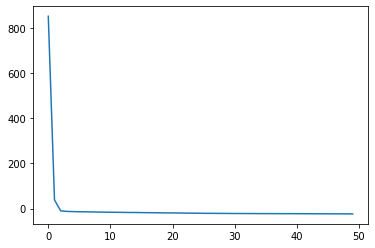

In [10]:
plt.plot(np.arange(len(obj_loss)), obj_loss)

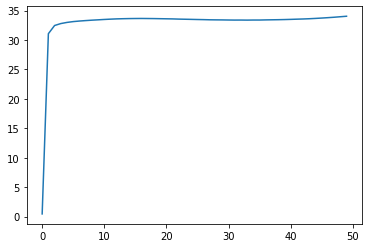

In [11]:
plt.plot(np.arange(len(recon_loss)), recon_loss)

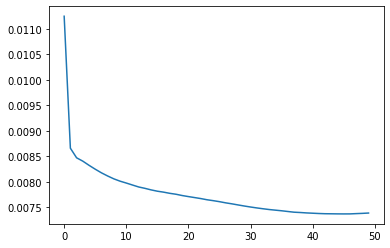

In [12]:
plt.plot(np.arange(len(overlap_loss)), overlap_loss)

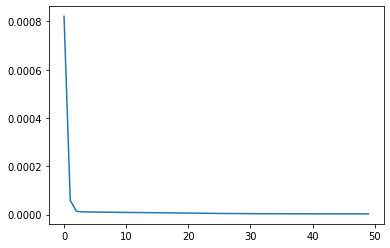

In [13]:
plt.plot(np.arange(len(sparsity_loss)), sparsity_loss)

In [14]:
trainer.trainset.shape

torch.Size([3993996, 41])

In [15]:
x = trainer.trainset[200].to(ssvae.device)
recon = ssvae.reconstruct(x)

In [16]:
qz_x, px_z, style_score = ssvae(x.unsqueeze(0))

In [17]:
qz_x

Normal(loc: torch.Size([1, 16]), scale: torch.Size([1, 16]))

In [18]:
px_z

Laplace(loc: torch.Size([1, 41]), scale: torch.Size([1, 41]))

In [19]:
style_score

tensor([[ 0.0096, -0.0146, -0.0281, -0.1057,  0.0534, -0.0244, -0.0116, -0.0337,
         -0.0209, -0.0326, -0.0600,  0.0452, -0.0376,  0.0038, -0.0144,  0.1368]],
       device='cuda:0', grad_fn=<SqueezeBackward1>)

In [20]:
ssvae.dec(style_score)

(tensor([[0.4183, 0.4061, 0.4076, 0.4230, 0.4428, 0.4600, 0.4724, 0.5104, 0.3383,
          0.3117, 0.2659, 0.2244, 0.2155, 0.2247, 0.2162, 0.2381, 0.9049, 0.8848,
          0.8671, 0.8505, 0.8431, 0.8408, 0.8393, 0.8385, 0.4628, 0.4706, 0.4776,
          0.4785, 0.4861, 0.4946, 0.5049, 0.4963, 0.0014, 0.0014, 0.0017, 0.0022,
          0.0020, 0.0028, 0.0023, 0.0026, 0.3450]], device='cuda:0',
        grad_fn=<AddmmBackward>), tensor(0.1000, device='cuda:0'))

In [21]:
traverse = np.arange(-3., 3.1, 0.1).astype(float)

In [22]:
index = np.random.choice(np.arange(len(trainer.trainset)), 500, replace=False)

In [26]:
traversals.max()

9.694432888549424e-05

In [36]:
trainer.trainset[index[i-1]]

tensor([2.7498e-01, 2.4802e-01, 3.5510e-01, 3.8637e-01, 5.3018e-01, 5.0228e-01,
        3.5190e-01, 3.8196e-01, 5.5343e-01, 3.4652e-01, 2.3120e-01, 1.9343e-01,
        1.5298e-01, 1.2309e-01, 9.0053e-02, 2.3242e-01, 9.6269e-01, 9.6015e-01,
        9.5609e-01, 9.0685e-01, 8.4690e-01, 8.4675e-01, 8.0587e-01, 8.2414e-01,
        8.8119e-01, 6.9592e-01, 6.3938e-01, 5.5089e-01, 3.7119e-01, 3.3952e-01,
        5.5595e-01, 6.7009e-01, 1.0824e-04, 1.5351e-04, 1.4373e-04, 1.6569e-04,
        2.1330e-04, 2.0917e-04, 2.5158e-04, 3.4873e-04, 3.9530e-01])

In [35]:
trainer.trainset[index[i]]

tensor([0.1130, 0.1728, 0.3525, 0.3087, 0.4210, 0.4905, 0.5715, 0.3955, 0.0202,
        0.0381, 0.1557, 0.1199, 0.0818, 0.0661, 0.1030, 0.0810, 0.9931, 0.9910,
        0.9854, 0.9758, 0.9467, 0.9391, 0.9340, 0.9144, 0.3227, 0.4461, 0.4056,
        0.5317, 0.8197, 0.6401, 0.7744, 0.6635, 0.0018, 0.0027, 0.0040, 0.0042,
        0.0067, 0.0054, 0.0044, 0.0030, 0.4011])

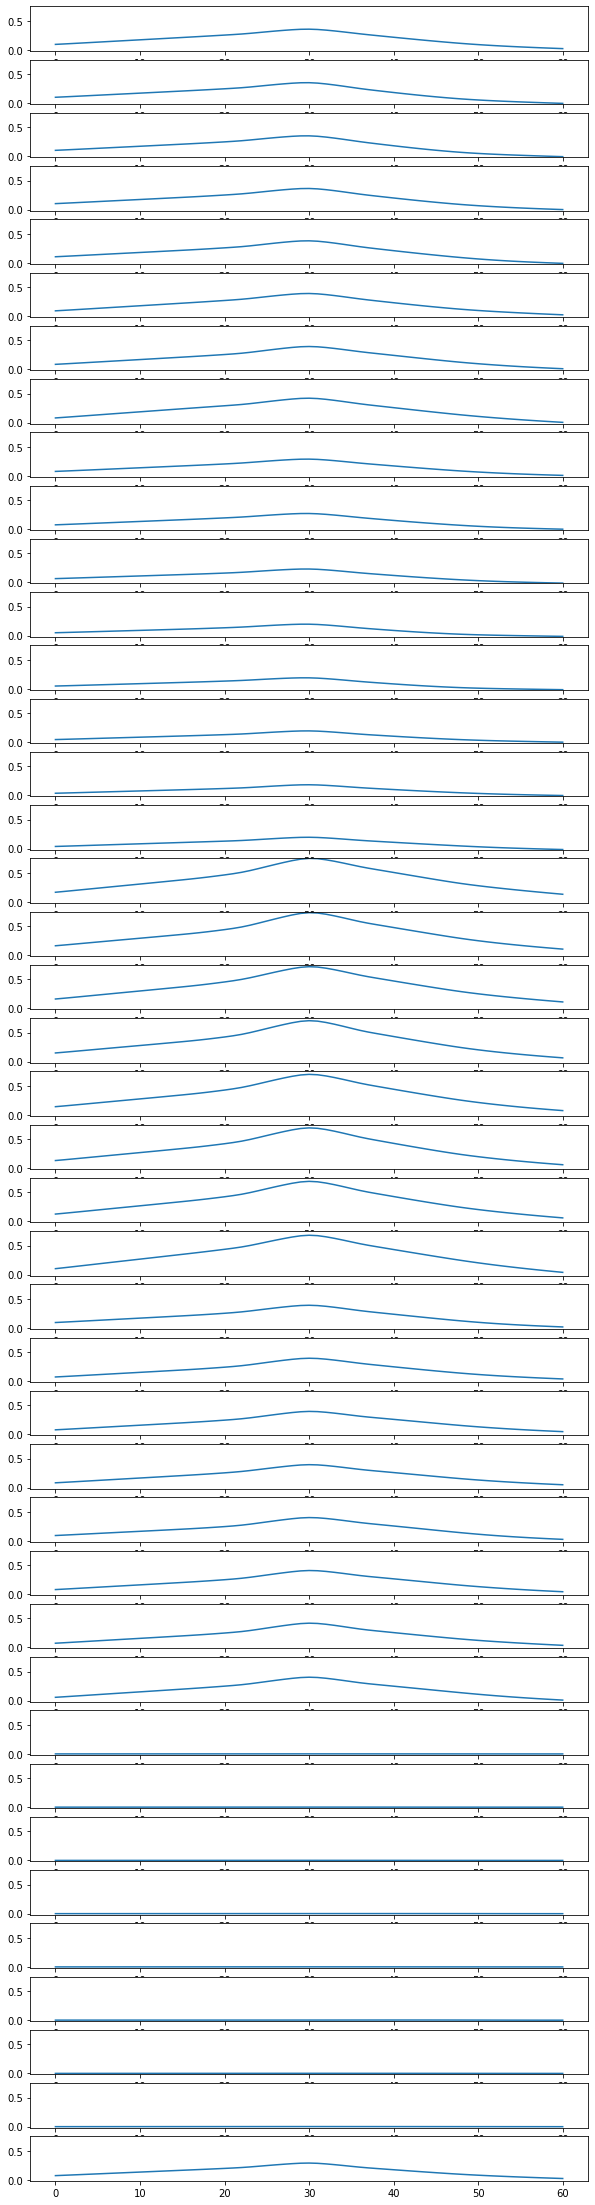

In [40]:
# Style 1
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    recon = ssvae.reconstruct(x)

    qz_x, px_z, style_score = ssvae(x.unsqueeze(0))

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 0] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(40)
fig.set_figwidth(10)
for i in range(traversals.shape[1]):
    axs[i].plot(traversals[:, i])
    axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())